In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# To make an enviroment we need:
#    - Init
#    - Reset
#    - State Space
#    - State Space Plus
#    - Way to denote possible actions
#    - Way to make sure move is legal
#    - Way to actually affect the env
#    - Step func needs to return new position, reward, isTerminal?, debug info
#    - Reset
#    - Print env to terminal

In [554]:
class GridWorld(object):
    
    def __init__(self, m, n, loot):
        
        self.grid = np.zeros((m, n))
        self.m    = m
        self.n    = n
        
        self.stateSpace = [i for i in range(self.m * self.n)]
        
        self.stateSpace.remove(self.m * self.n -1)
        
        self.stateSpacePlus = [i for i in range(self.m * self.n)]
            
        self.actionSpace = {
                            'U': -self.m,
                            'D': self.m,
                            'L': -1,
                            'R': 1
                           }
        
        self.possibleActions = ['U', 'D', 'L', 'R']
        
        self.addLoot(loot)
        
        self.addWalls()
        
        self.agentPosition    = 0
        self.exit             = 5
        
        self.grid[self.m-1][self.n-1] = 5
        
        self.FLAGS = 0
        
        
        
    def addLoot(self, loot):
        
        self.loot = loot
        
        # i = visual representation of tile on grid
        i = 2
        
        for square in self.loot:
            
            # Find position
            x = square // self.m
            y = square %  self.n
            
            self.grid[x][y] = i
    
    def addWalls(self):
        
        self.WallSpace = [30, 31, 32, 39, 48, 49, 50]
  #      self.WallSpace = [30, 31, 32, 39, 48]    

        j = 3            
        
        for square in self.WallSpace:
            x = square // self.m
            y = square %  self.n 
            self.grid[x][y] = j
        
    def isTerminalState(self, state):
        return state in self.stateSpacePlus and state not in self.stateSpace
    
    def getAgentRowAndColumn(self):
        
        x = self.agentPosition // self.m
        y = self.agentPosition %  self.n
        
        return x,y
    
    def setState(self, state):
        
        x, y            = self.getAgentRowAndColumn()
        self.grid[x][y] = 0
        
        self.agentPosition = state
        x, y               = self.getAgentRowAndColumn()
        
        self.grid[x][y] = 1

    def offGridMove(self, newState, oldState):
        
        if newState not in self.stateSpacePlus:
            return True
        elif oldState % self.m == 0 and newState % self.m == self.m - 1:
            return True
        elif oldState % self.m == self.m - 1 and newState % self.m == 0:
            return True
        else:
            return False
    
    def step(self, action):
         
        env.render()
        x, y        = self.getAgentRowAndColumn()
        resultState = self.agentPosition + self.actionSpace[action]
                
        print("[+] Agent Result State: {}".format(resultState))
        
        reward = -1 if not self.isTerminalState(resultState) else 0
        
        # If treasure tile
        if resultState in self.loot:
            print("[+] Agent received the treasure. +50 ")
            reward += 50
            print("[+] Current Reward: {0}, Total Reward: {1}".format(reward, epRewards))
            self.FLAGS = 1
            
            global LOOTCOUNT
            LOOTCOUNT += 1
            
            self.loot = []
        
        if not self.offGridMove(resultState, self.agentPosition):
            if resultState in self.WallSpace:
                print("[+] Hit a wall..\n")
                return self.agentPosition, reward, self.isTerminalState(self.agentPosition), None
            else:
                print("[+] No issues, continuing game...")
                self.setState(resultState)
                return resultState, reward, self.isTerminalState(self.agentPosition), None
        else:
            print("[+] Attempted off-grid-move...")
            return self.agentPosition, reward, self.isTerminalState(self.agentPosition), None
    

    def reset(self):
        
        self.grid = np.zeros((self.m, self.n))
        
        self.agentPosition            = 0
        self.grid[self.m-1][self.m-1] = 5

        self.addLoot(self.loot)
        self.addWalls()
        
        return self.agentPosition

        
    def render(self):
        print("-------------------------------------")
        
        for row in self.grid:
               
            for col in row:
               # empty square
                if col == 0:
                    print('-', end = '\t')
                # Agent
                elif col == 1:
                    print('X', end = '\t')
               # Entrance to Magic Square
                elif col == 2:
                    print('Loot', end = '\t')
                # Return to Magic Square
                elif col == 3:
                    print('W', end = '\t')
                # 
                elif col == 4:
                    print('Sec', end = '\t')
                #
                elif col == 5:
                    print('Out', end = '\t')

            
            print('\n')
        
        print("-------------------------------------");
        
    def actionSpaceSample(self):
        return np.random.choice(self.possibleActions)

def maxAction(Q, state, actions):
    
    values  = np.array([Q[state,a] for a in actions])
    action  = np.argmax(values)
    
    return actions[action]


-------------------------------------
-	-	-	-	-	-	-	-	-	

-	-	-	-	-	-	-	-	-	

-	-	-	-	-	-	-	-	-	

-	-	-	W	W	W	-	-	-	

-	-	-	W	Loot	-	-	-	-	

-	-	-	W	W	W	-	-	-	

-	-	-	-	-	-	-	-	-	

-	-	-	-	-	-	-	-	-	

-	-	-	-	-	-	-	-	Out	

-------------------------------------
[+] Starting Game: 0
-------------------------------------
-	-	-	-	-	-	-	-	-	

-	-	-	-	-	-	-	-	-	

-	-	-	-	-	-	-	-	-	

-	-	-	W	W	W	-	-	-	

-	-	-	W	Loot	-	-	-	-	

-	-	-	W	W	W	-	-	-	

-	-	-	-	-	-	-	-	-	

-	-	-	-	-	-	-	-	-	

-	-	-	-	-	-	-	-	Out	

-------------------------------------
[+] Agent Result State: 1
[+] No issues, continuing game...
-------------------------------------
-	X	-	-	-	-	-	-	-	

-	-	-	-	-	-	-	-	-	

-	-	-	-	-	-	-	-	-	

-	-	-	W	W	W	-	-	-	

-	-	-	W	Loot	-	-	-	-	

-	-	-	W	W	W	-	-	-	

-	-	-	-	-	-	-	-	-	

-	-	-	-	-	-	-	-	-	

-	-	-	-	-	-	-	-	Out	

-------------------------------------
[+] Agent Result State: 2
[+] No issues, continuing game...
-------------------------------------
-	-	X	-	-	-	-	-	-	

-	-	-	-	-	-	-	-	-	

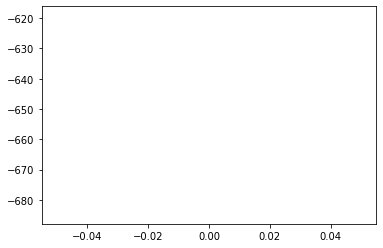

In [555]:
if __name__ ==  '__main__':
    
    loot = {40}
    env  = GridWorld(9, 9, loot)
    env.render()
    
    # Hyperparameters
    
    ALPHA   = 0.1 # Learning Rate
    GAMMA   = 1.0 # Far Sighted
    EPSILON = 1.0 # Epsilon greedy 
    
    # Q Table
    
    LOOTCOUNT = 0
    
    
    Q = {}
    
    for state in env.stateSpacePlus:
        
        for action in env.possibleActions:
            
            # 0 is "Optimistic Initial Values" - Since agent recv reward if -1 per step, 
            # it can never have reward of 0, so it promotes exploration 
            
            Q[state, action] = 0
    
    # Params
    
    numGames     = 1
    totalRewards = np.zeros(numGames)
    
    for i in range(numGames):
        
        if i % 500 == 0:
            print("[+] Starting Game:", i)
        
        done = False
        
        epRewards    = 0
        
        observation  = env.reset()
        
        while not done:
             
            # Random number for epsilon greedy selection
            rand       = np.random.random()
            
            # find max action for given state
            action = maxAction(Q, observation, env.possibleActions) if rand < (1 - EPSILON) \
                            else env.actionSpaceSample()
        

            observation_, reward, done, info = env.step(action)
            
            epRewards  += reward
            
            action_  = maxAction(Q, observation_, env.possibleActions)
            
            Q[observation, action] = Q[observation, action] + \
                                     ALPHA * (reward + GAMMA * Q[observation_, action_] - Q[observation, action])
            
            # Let environment know it has changed states
            observation = observation_ 
            
        if EPSILON - 2 / numGames > 0:
            EPSILON -= 2/ numGames
            
        else:
            EPSILON = 0
            
        totalRewards[i] = epRewards    
    
    
    print("Total Number of Loot Found: ", LOOTCOUNT  )
    plt.plot(totalRewards)
    plt.show()
    
    

In [488]:
env.reset()

(0, 4)

In [481]:
env.step(env.actionSpaceSample())

-------------------------------------
-	-	-	-	-	-	-	-	-	

-	-	-	-	-	-	-	-	-	

-	-	-	-	-	-	-	-	-	

X	-	-	W	W	W	-	-	-	

-	-	-	W	Loot	-	-	-	-	

-	-	-	W	W	W	-	-	-	

-	-	-	-	-	-	-	-	-	

-	-	-	-	-	-	-	-	-	

-	-	-	-	-	-	-	-	-	

-------------------------------------
[+] Agent Result State: 18
[+] No issues, continuing game...


(18, -1, False, None)

In [470]:
Q[(76, 'D')]

0

In [362]:
magicSquares = {18: 54, 
                63: 14}

In [9]:
for square in magicSquares:
    print("Square: ", square)
    x = square // 9
    y = square % 9
    print("X: {0}, y: {1}".format( x, y) )

Square:  18
X: 2, y: 0
Square:  63
X: 7, y: 0
